In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로딩

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


# 전처리

In [4]:
data.isna().sum() / len(data) * 100

BuyItNow                 0.000000
startprice               0.000000
carrier                 78.720539
color                   39.932660
productline              0.000000
noDescription            0.000000
charCountDescription     0.000000
upperCaseDescription     0.000000
sold                     0.000000
dtype: float64

In [5]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [6]:
data['carrier'].unique()

array([nan, 'AT&T', 'Sprint/T-Mobile', 'Verizon'], dtype=object)

In [7]:
data['carrier'].value_counts()

carrier
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: count, dtype: int64

In [8]:
data.groupby('carrier')['sold'].value_counts(sort=False)

carrier          sold
AT&T             0       101
                 1        76
Sprint/T-Mobile  0        28
                 1        24
Verizon          0        41
                 1        46
Name: count, dtype: int64

In [9]:
print("AT&T", 76 / (76+101))
print("Sprint/T-Mobile ", 24 / (24+28))
print("Verizon", 46 / (46+41))

AT&T 0.4293785310734463
Sprint/T-Mobile  0.46153846153846156
Verizon 0.5287356321839081


통신사는 판매에 큰 영향을 미치지 않는 것으로 판단되고 너무 많은 결측이 있어 삭제예정

In [10]:
data['color'].unique()

array(['White', nan, 'Space Gray', 'Midnight Black', 'Aura Black', 'Gold',
       'Black', 'Prism Black'], dtype=object)

In [11]:
data['color'].value_counts()

color
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

# 기종별 color 최빈값을 찾아 결측값 대치

기종별로 색상 최빈값을 구해서 color nan값을 대치 

In [12]:
color_by_product = data.groupby('productline')['color'].value_counts()
color_by_product

productline    color         
Galaxy_Note10  Space Gray         91
               White              76
               Gold               46
               Aura Black         19
Galaxy_Note8   Midnight Black     58
               White              44
               Space Gray          2
               Gold                1
Galaxy_Note9   White              37
               Space Gray         27
               Black              10
Galaxy_S10     White               5
               Gold                1
               Prism Black         1
               Space Gray          1
Galaxy_S7      Midnight Black    111
               White              21
               Space Gray          3
Galaxy_S8      Midnight Black     59
               White              55
               Space Gray         38
Galaxy_S9      White              51
               Midnight Black     46
               Space Gray          1
Unknown        White              39
               Black              28
        

In [13]:
color_by_product

productline    color         
Galaxy_Note10  Space Gray         91
               White              76
               Gold               46
               Aura Black         19
Galaxy_Note8   Midnight Black     58
               White              44
               Space Gray          2
               Gold                1
Galaxy_Note9   White              37
               Space Gray         27
               Black              10
Galaxy_S10     White               5
               Gold                1
               Prism Black         1
               Space Gray          1
Galaxy_S7      Midnight Black    111
               White              21
               Space Gray          3
Galaxy_S8      Midnight Black     59
               White              55
               Space Gray         38
Galaxy_S9      White              51
               Midnight Black     46
               Space Gray          1
Unknown        White              39
               Black              28
        

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [15]:
color_by_product.index

MultiIndex([('Galaxy_Note10',     'Space Gray'),
            ('Galaxy_Note10',          'White'),
            ('Galaxy_Note10',           'Gold'),
            ('Galaxy_Note10',     'Aura Black'),
            ( 'Galaxy_Note8', 'Midnight Black'),
            ( 'Galaxy_Note8',          'White'),
            ( 'Galaxy_Note8',     'Space Gray'),
            ( 'Galaxy_Note8',           'Gold'),
            ( 'Galaxy_Note9',          'White'),
            ( 'Galaxy_Note9',     'Space Gray'),
            ( 'Galaxy_Note9',          'Black'),
            (   'Galaxy_S10',          'White'),
            (   'Galaxy_S10',           'Gold'),
            (   'Galaxy_S10',    'Prism Black'),
            (   'Galaxy_S10',     'Space Gray'),
            (    'Galaxy_S7', 'Midnight Black'),
            (    'Galaxy_S7',          'White'),
            (    'Galaxy_S7',     'Space Gray'),
            (    'Galaxy_S8', 'Midnight Black'),
            (    'Galaxy_S8',          'White'),
            (    'Ga

In [16]:
color_by_product.index
colors = [('Galaxy_Note10', 'Space Gray'), ('Galaxy_Note8','Midnight Black'), ('Galaxy_Note9','White'), 
  ('Galaxy_S10', 'White'), ('Galaxy_S7', 'Midnight Black'), ('Galaxy_S8', 'Midnight Black'),
('Galaxy_S9','White'), ('Unknown','White')]

In [17]:
data['color']

0                White
1                  NaN
2                  NaN
3           Space Gray
4           Space Gray
             ...      
1480               NaN
1481    Midnight Black
1482        Space Gray
1483    Midnight Black
1484    Midnight Black
Name: color, Length: 1485, dtype: object

In [18]:
# print(type(data.loc[(data['color'].isna() ==True) & (data['productline'] == 'Galaxy_Note10'), 'color']))
# data.loc[(data['color'].isna() ==True) & (data['productline'] == 'Galaxy_Note10'), 'color'] = 

In [19]:
data.loc[(data['color'].isna() ==True) & (data['productline'] == 'Galaxy_Note10'), 'color']

27      NaN
29      NaN
30      NaN
42      NaN
43      NaN
       ... 
1397    NaN
1416    NaN
1428    NaN
1429    NaN
1464    NaN
Name: color, Length: 119, dtype: object

In [20]:
# colors = [('Galaxy_Note10', 'Space Gray'), ('Galaxy_Note8','Midnight Black'), ('Galaxy_Note9','White'), 
#   ('Galaxy_S10', 'White'), ('Galaxy_S7', 'Midnight Black'), ('Galaxy_S8', 'Midnight Black'),
# ('Galaxy_S9','White'), ('Unknown','White')]
for product, color in colors:
#     print(product, color)
    data.loc[(data['color'].isna() == True) & (data['productline'] == product), 'color'] = color
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


# EDA

In [21]:
data.loc[data['productline'] == 'Galaxy_Note9', 'startprice'].describe() 

count    107.000000
mean     254.561402
std      126.208902
min        0.010000
25%      177.500000
50%      259.950000
75%      349.990000
max      575.000000
Name: startprice, dtype: float64

In [22]:
data.loc[(data['productline'] == 'Unknown') & (data['color'] == 'Black'), 'startprice'].describe() 

count     28.000000
mean     134.785714
std      134.173500
min        0.990000
25%       15.000000
50%       99.995000
75%      202.492500
max      473.600000
Name: startprice, dtype: float64

In [23]:
data.groupby('color')['sold'].value_counts(sort=False)

color           sold
Aura Black      0        13
                1         6
Black           0        22
                1        16
Gold            0        34
                1        18
Midnight Black  0       257
                1       282
Prism Black     0         1
Space Gray      0       165
                1       134
White           0       307
                1       230
Name: count, dtype: int64

In [24]:
data['sold'].value_counts()

sold
0    799
1    686
Name: count, dtype: int64

컬러가 판매에 큰 영향을 주는 것 같지 않음

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [26]:
data['color'].unique()

array(['White', 'Space Gray', 'Midnight Black', 'Aura Black', 'Gold',
       'Black', 'Prism Black'], dtype=object)

In [27]:
for x in data['color'].unique():
    if "Black" in x:
        print('Black')
    else:
        print(x)
    

White
Space Gray
Black
Black
Gold
Black
Black


In [28]:
data['color'] = data['color'].apply(lambda x: 'Black' if "Black" in x else x)

In [29]:
data['color'].value_counts()

color
Black         597
White         537
Space Gray    299
Gold           52
Name: count, dtype: int64

In [30]:
data_no_color = data.copy()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [32]:
data['startprice'].describe()

count    1485.000000
mean      216.844162
std       172.893308
min         0.010000
25%        80.000000
50%       198.000000
75%       310.000000
max       999.000000
Name: startprice, dtype: float64

<Axes: >

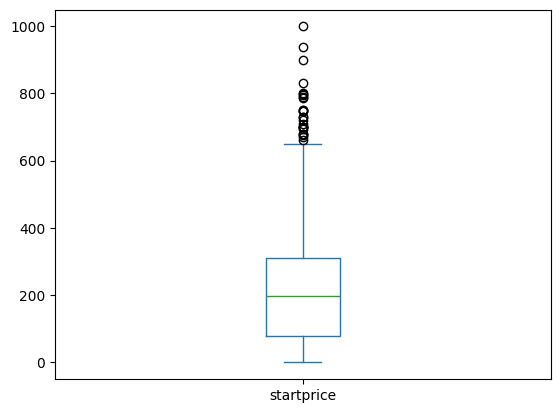

In [33]:
data['startprice'].plot(kind='box')

In [34]:
print("정상범위 최대값", 310 + (1.5 * (310.000000 - 80.000000)))

정상범위 최대값 655.0


<Axes: xlabel='startprice', ylabel='Count'>

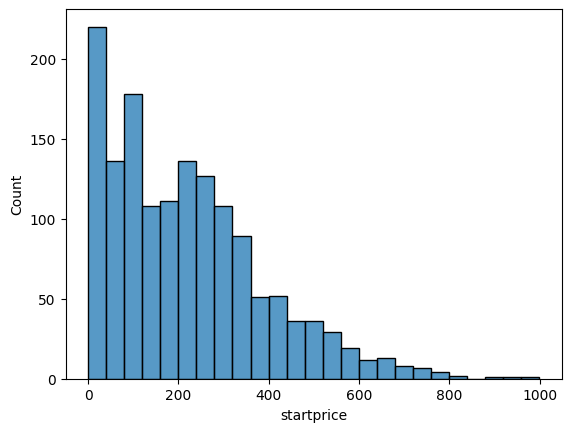

In [35]:
sns.histplot(data['startprice'])

In [36]:
print(len(data[data['startprice'] > 655.0]))
data[data['startprice'] > 655.0]

27


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,NaN,Black,Galaxy_Note8,no description,83,3,0
505,0,785.00,Sprint/T-Mobile,Gold,Galaxy_Note10,contains description,0,0,0
617,1,800.00,NaN,Gold,Galaxy_Note10,contains description,0,0,0
703,0,795.99,AT&T,Space Gray,Galaxy_Note10,contains description,0,0,0
714,0,660.00,NaN,White,Galaxy_Note10,contains description,0,0,0
730,0,675.00,NaN,White,Galaxy_Note10,contains description,0,0,1
742,0,829.99,NaN,Gold,Galaxy_Note10,contains description,0,0,0
766,0,900.00,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
791,0,720.12,AT&T,Black,Galaxy_S8,contains description,0,0,0
801,0,699.00,NaN,Space Gray,Galaxy_Note10,no description,12,0,0


In [37]:
meanbyproduct = data.groupby('productline')['startprice'].describe()
meanbyproduct

,count,mean,std,min,25%,50%,75%,max
productline,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00


In [38]:
for i in meanbyproduct['count']:
    print(i)

351.0
153.0
107.0
8.0
227.0
277.0
158.0
204.0


In [39]:
meanbyproduct.apply(print, axis=1)

count    351.000000
mean     366.931311
std      198.259953
min        0.990000
25%      250.000000
50%      380.000000
75%      499.970000
max      939.000000
Name: Galaxy_Note10, dtype: float64
count    153.000000
mean     176.065033
std      122.104147
min        0.010000
25%       99.000000
50%      187.500000
75%      239.880000
max      699.950000
Name: Galaxy_Note8, dtype: float64
count    107.000000
mean     254.561402
std      126.208902
min        0.010000
25%      177.500000
50%      259.950000
75%      349.990000
max      575.000000
Name: Galaxy_Note9, dtype: float64
count      8.000000
mean     294.583750
std       79.754787
min      160.000000
25%      246.250000
50%      301.335000
75%      341.750000
max      420.000000
Name: Galaxy_S10, dtype: float64
count    227.000000
mean      84.190000
std       66.527227
min        0.010000
25%       48.745000
50%       79.000000
75%      104.990000
max      499.000000
Name: Galaxy_S7, dtype: float64
count    277.000000
mean     

productline
Galaxy_Note10    None
Galaxy_Note8     None
Galaxy_Note9     None
Galaxy_S10       None
Galaxy_S7        None
Galaxy_S8        None
Galaxy_S9        None
Unknown          None
dtype: object

In [40]:
meanbyproduct.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [41]:
meanbyproduct['maxpirce'] = meanbyproduct.apply(lambda x: x['75%'] + (1.5*(x['75%'] - x['25%'])), axis=1)
meanbyproduct

,count,mean,std,min,25%,50%,75%,max,maxpirce
productline,,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00,874.9250
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95,451.2000
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00,608.7250
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00,485.0000
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00,189.3575
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00,440.0150
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00,531.1950
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00,582.4850


In [42]:
for index, item in meanbyproduct[['maxpirce']].iterrows():
    print(index, item.values[0])
    display(data[(data['productline'] == index) & (data['startprice'] > item.values[0])])
    

Galaxy_Note10 874.9250000000001


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
766,0,900.0,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
1002,0,939.0,NaN,Gold,Galaxy_Note10,contains description,0,0,0


Galaxy_Note8 451.2


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,NaN,Black,Galaxy_Note8,no description,83,3,0
701,0,463.26,AT&T,White,Galaxy_Note8,no description,99,2,0
901,0,600.00,AT&T,Black,Galaxy_Note8,no description,30,1,0
938,0,649.99,NaN,Black,Galaxy_Note8,contains description,0,0,0


Galaxy_Note9 608.725


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


Galaxy_S10 485.0


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


Galaxy_S7 189.35749999999996


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
36,0,289.95,NaN,Black,Galaxy_S7,contains description,0,0,0
50,0,269.99,NaN,Black,Galaxy_S7,contains description,0,0,0
86,0,279.95,NaN,Black,Galaxy_S7,contains description,0,0,0
139,0,279.95,NaN,Black,Galaxy_S7,contains description,0,0,0
205,1,229.97,AT&T,Black,Galaxy_S7,contains description,0,0,0
363,0,229.99,Verizon,Space Gray,Galaxy_S7,contains description,0,0,1
460,0,198.00,Verizon,White,Galaxy_S7,no description,99,4,0
669,0,200.00,NaN,Black,Galaxy_S7,contains description,0,0,0
750,1,499.00,NaN,Black,Galaxy_S7,contains description,0,0,0
774,0,227.00,AT&T,White,Galaxy_S7,no description,98,2,0


Galaxy_S8 440.015


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
207,0,499.99,AT&T,Space Gray,Galaxy_S8,contains description,0,0,0
791,0,720.12,AT&T,Black,Galaxy_S8,contains description,0,0,0
1102,0,999.00,NaN,Black,Galaxy_S8,contains description,0,0,0


Galaxy_S9 531.1949999999999


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
660,0,649.99,Verizon,Black,Galaxy_S9,contains description,0,0,0
1005,0,544.49,NaN,Black,Galaxy_S9,no description,90,5,0
1015,0,540.00,Verizon,White,Galaxy_S9,no description,36,22,0
1084,0,573.74,NaN,White,Galaxy_S9,contains description,0,0,0
1116,0,695.00,AT&T,White,Galaxy_S9,contains description,0,0,0


Unknown 582.485


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1069,0,595.00,NaN,White,Unknown,contains description,0,0,1
1121,1,700.00,NaN,White,Unknown,contains description,0,0,0
1125,0,700.00,NaN,White,Unknown,contains description,0,0,0
1127,0,599.00,NaN,White,Unknown,contains description,0,0,0
1175,1,599.99,NaN,White,Unknown,contains description,0,0,0
1349,0,590.00,NaN,White,Unknown,contains description,0,0,1


In [43]:
meanbyproduct['maxpirce'].index

Index(['Galaxy_Note10', 'Galaxy_Note8', 'Galaxy_Note9', 'Galaxy_S10',
       'Galaxy_S7', 'Galaxy_S8', 'Galaxy_S9', 'Unknown'],
      dtype='object', name='productline')

In [44]:
for idx, item in zip(meanbyproduct['maxpirce'].index, meanbyproduct['maxpirce']):
    print(idx)
    print(item)
    display(data[(data['productline'] == idx) & (data['startprice'] > item)])

Galaxy_Note10
874.9250000000001


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
766,0,900.0,NaN,Space Gray,Galaxy_Note10,contains description,0,0,0
1002,0,939.0,NaN,Gold,Galaxy_Note10,contains description,0,0,0


Galaxy_Note8
451.2


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
468,0,699.95,NaN,Black,Galaxy_Note8,no description,83,3,0
701,0,463.26,AT&T,White,Galaxy_Note8,no description,99,2,0
901,0,600.00,AT&T,Black,Galaxy_Note8,no description,30,1,0
938,0,649.99,NaN,Black,Galaxy_Note8,contains description,0,0,0


Galaxy_Note9
608.725


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


Galaxy_S10
485.0


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold


Galaxy_S7
189.35749999999996


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
36,0,289.95,NaN,Black,Galaxy_S7,contains description,0,0,0
50,0,269.99,NaN,Black,Galaxy_S7,contains description,0,0,0
86,0,279.95,NaN,Black,Galaxy_S7,contains description,0,0,0
139,0,279.95,NaN,Black,Galaxy_S7,contains description,0,0,0
205,1,229.97,AT&T,Black,Galaxy_S7,contains description,0,0,0
363,0,229.99,Verizon,Space Gray,Galaxy_S7,contains description,0,0,1
460,0,198.00,Verizon,White,Galaxy_S7,no description,99,4,0
669,0,200.00,NaN,Black,Galaxy_S7,contains description,0,0,0
750,1,499.00,NaN,Black,Galaxy_S7,contains description,0,0,0
774,0,227.00,AT&T,White,Galaxy_S7,no description,98,2,0


Galaxy_S8
440.015


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
207,0,499.99,AT&T,Space Gray,Galaxy_S8,contains description,0,0,0
791,0,720.12,AT&T,Black,Galaxy_S8,contains description,0,0,0
1102,0,999.00,NaN,Black,Galaxy_S8,contains description,0,0,0


Galaxy_S9
531.1949999999999


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
660,0,649.99,Verizon,Black,Galaxy_S9,contains description,0,0,0
1005,0,544.49,NaN,Black,Galaxy_S9,no description,90,5,0
1015,0,540.00,Verizon,White,Galaxy_S9,no description,36,22,0
1084,0,573.74,NaN,White,Galaxy_S9,contains description,0,0,0
1116,0,695.00,AT&T,White,Galaxy_S9,contains description,0,0,0


Unknown
582.485


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1069,0,595.00,NaN,White,Unknown,contains description,0,0,1
1121,1,700.00,NaN,White,Unknown,contains description,0,0,0
1125,0,700.00,NaN,White,Unknown,contains description,0,0,0
1127,0,599.00,NaN,White,Unknown,contains description,0,0,0
1175,1,599.99,NaN,White,Unknown,contains description,0,0,0
1349,0,590.00,NaN,White,Unknown,contains description,0,0,1


In [45]:
data['color'].value_counts()

color
Black         597
White         537
Space Gray    299
Gold           52
Name: count, dtype: int64

<Axes: xlabel='color'>

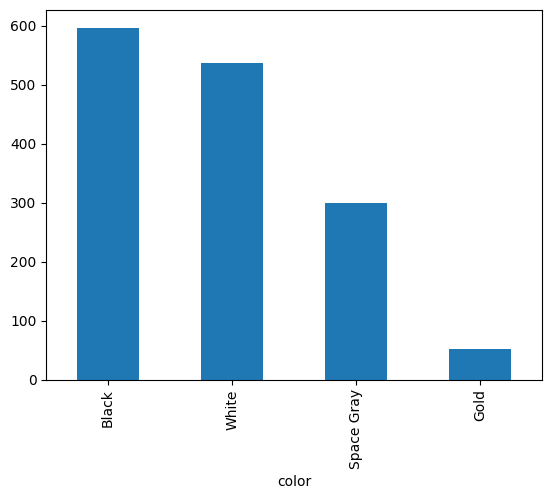

In [46]:
data['color'].value_counts().plot(kind='bar')

In [47]:
data.groupby('color')['sold'].value_counts(sort=False)

color       sold
Black       0       293
            1       304
Gold        0        34
            1        18
Space Gray  0       165
            1       134
White       0       307
            1       230
Name: count, dtype: int64

컬러는 구매에 큰 영향이 없다.

In [48]:
data['productline'].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

<Axes: xlabel='productline'>

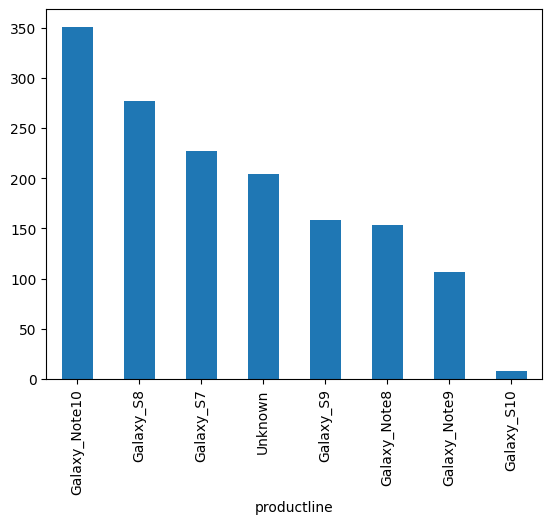

In [49]:
data['productline'].value_counts().plot(kind='bar')

In [50]:
data.groupby('productline')['sold'].value_counts(sort=False)

productline    sold
Galaxy_Note10  0       202
               1       149
Galaxy_Note8   0        73
               1        80
Galaxy_Note9   0        58
               1        49
Galaxy_S10     0         4
               1         4
Galaxy_S7      0       102
               1       125
Galaxy_S8      0       145
               1       132
Galaxy_S9      0        93
               1        65
Unknown        0       122
               1        82
Name: count, dtype: int64

기종에 따라서 판매량이 크게 달라지지 않는다.

In [51]:
data['noDescription'].value_counts()

noDescription
contains description    856
no description          629
Name: count, dtype: int64

In [52]:
def reverse_value(x):
    if x == 'contains description':
        return 'no description'
    elif x == 'no description':
        return 'contains description'

In [53]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,White,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [54]:
data['noDescription'] = data['noDescription'].apply(reverse_value)
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0
2,0,199.99,NaN,White,Unknown,contains description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,no description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,no description,0,0,1


In [55]:
data.groupby('noDescription')['sold'].value_counts()

noDescription         sold
contains description  0       356
                      1       273
no description        0       443
                      1       413
Name: count, dtype: int64

noDescription 도 판매와는 관계가 없다.

<Axes: xlabel='charCountDescription', ylabel='Count'>

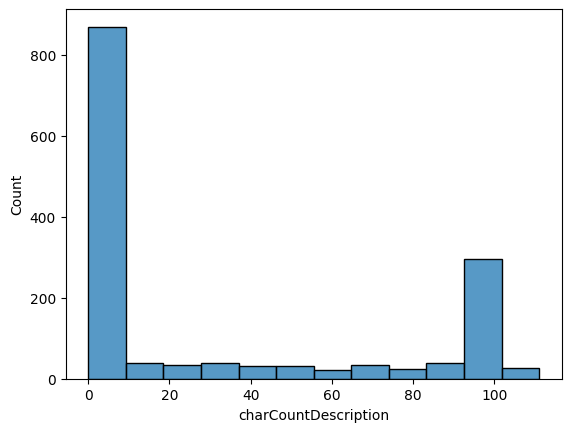

In [56]:
sns.histplot(data['charCountDescription'])

In [57]:
data['charCountDescription'].describe()

count    1485.000000
mean       31.184512
std        41.744518
min         0.000000
25%         0.000000
50%         0.000000
75%        79.000000
max       111.000000
Name: charCountDescription, dtype: float64

In [58]:
data[data['charCountDescription'] > 0]['sold'].value_counts()

sold
0    356
1    273
Name: count, dtype: int64

charCountDescription 의 글자수도 판매와는 관련이 없다.

<Axes: xlabel='upperCaseDescription', ylabel='Count'>

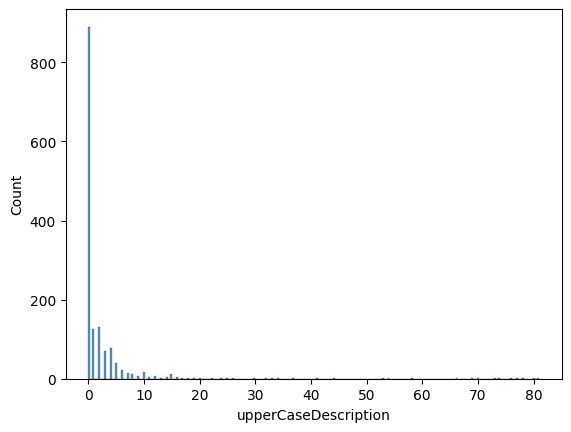

In [59]:
sns.histplot(data['upperCaseDescription'])

In [60]:
data[data['upperCaseDescription'] > 0]['sold'].value_counts()

sold
0    343
1    252
Name: count, dtype: int64

In [61]:
data[data['upperCaseDescription'] == 0]['sold'].value_counts()

sold
0    456
1    434
Name: count, dtype: int64

upperCaseDescription 판매에 영향이 없다.

In [62]:
data['BuyItNow'].value_counts()

BuyItNow
0    818
1    667
Name: count, dtype: int64

In [63]:
data.groupby('BuyItNow')['sold'].value_counts(sort=False)

BuyItNow  sold
0         0       639
          1       179
1         0       160
          1       507
Name: count, dtype: int64

In [64]:
print("BuyItNow0일때", 179 / (179+639))
print("BuyItNow1일때", 507 / (507+160))

BuyItNow0일때 0.21882640586797067
BuyItNow1일때 0.760119940029985


BuyItNow 가 1일 때 판매량이 높다.

# Feature Engineering

In [65]:
data.head(2)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0


In [66]:
data2 = data.copy()
data3 = data.copy()

carrier, noDescription	charCountDescription	upperCaseDescription 는 삭제

In [67]:
data = data.drop(['carrier', 'noDescription', 'charCountDescription', 'upperCaseDescription'], axis=1)

In [68]:
data2 = data2.drop(['carrier', 'charCountDescription', 'upperCaseDescription'], axis=1)

In [69]:
data.head()

,BuyItNow,startprice,color,productline,sold
0,0,199.99,White,Galaxy_S9,1
1,0,235.00,White,Galaxy_Note9,0
2,0,199.99,White,Unknown,0
3,1,175.00,Space Gray,Galaxy_Note9,1
4,1,100.00,Space Gray,Galaxy_S8,1


In [70]:
data2.head()

,BuyItNow,startprice,color,productline,noDescription,sold
0,0,199.99,White,Galaxy_S9,no description,1
1,0,235.00,White,Galaxy_Note9,no description,0
2,0,199.99,White,Unknown,contains description,0
3,1,175.00,Space Gray,Galaxy_Note9,no description,1
4,1,100.00,Space Gray,Galaxy_S8,no description,1


In [71]:
data['color'].nunique()

4

In [72]:
data['productline'].nunique()

8

In [73]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,BuyItNow,startprice,sold,color_Gold,color_Space Gray,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown
0,0,199.99,1,False,False,True,False,False,False,False,False,True,False
1,0,235.00,0,False,False,True,False,True,False,False,False,False,False
2,0,199.99,0,False,False,True,False,False,False,False,False,False,True
3,1,175.00,1,False,True,False,False,True,False,False,False,False,False
4,1,100.00,1,False,True,False,False,False,False,False,True,False,False


In [74]:
data2 = pd.get_dummies(data2, drop_first=True)
data2.head()

,BuyItNow,startprice,sold,color_Gold,color_Space Gray,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
0,0,199.99,1,False,False,True,False,False,False,False,False,True,False,True
1,0,235.00,0,False,False,True,False,True,False,False,False,False,False,True
2,0,199.99,0,False,False,True,False,False,False,False,False,False,True,False
3,1,175.00,1,False,True,False,False,True,False,False,False,False,False,True
4,1,100.00,1,False,True,False,False,False,False,False,True,False,False,True


# 데이터 분리 및 분석

In [75]:
X = data.drop('sold', axis=1)
y = data['sold']

In [76]:
X2 = data2.drop('sold', axis=1)
y2 = data2['sold']

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=7)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [80]:
dtc = DecisionTreeClassifier(max_depth= 9, random_state=7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print("accuracy_score", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

accuracy_score 0.7912457912457912
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       158
           1       0.80      0.74      0.77       139

    accuracy                           0.79       297
   macro avg       0.79      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



In [81]:
dtc2 = DecisionTreeClassifier(max_depth= 3, random_state=7)
dtc2.fit(X2_train, y2_train)
pred2 = dtc2.predict(X2_test)
print("accuracy_score", accuracy_score(y2_test, pred2))
print(classification_report(y2_test, pred2))

accuracy_score 0.7777777777777778
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       158
           1       0.85      0.64      0.73       139

    accuracy                           0.78       297
   macro avg       0.79      0.77      0.77       297
weighted avg       0.79      0.78      0.77       297



In [82]:
dtc2 = DecisionTreeClassifier(max_depth= 3, random_state=7)
dtc2.fit(X2_train, y2_train)
pred2 = dtc2.predict(X2_test)
print("accuracy_score", accuracy_score(y2_test, pred2))
print(classification_report(y2_test, pred2))

accuracy_score 0.7777777777777778
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       158
           1       0.85      0.64      0.73       139

    accuracy                           0.78       297
   macro avg       0.79      0.77      0.77       297
weighted avg       0.79      0.78      0.77       297



In [83]:
for i in range(1, 30):
    dtc = DecisionTreeClassifier(max_depth= i, random_state=7)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, "accuracy_score", accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 accuracy_score 0.7811447811447811
1               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

2 accuracy_score 0.7811447811447811
2               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

3 accuracy_score 0.7777777777777778
3               precision    recall  f1-score   support

           0       0.74      0.90      0.81       158
           1       0.85      0.64      0.73       139

    accuracy                           0.78       297
   macro avg  

In [84]:
for i in range(1, 30):
    dtc = DecisionTreeClassifier(max_depth= i, random_state=7)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, "accuracy_score", accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 accuracy_score 0.7811447811447811
1               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

2 accuracy_score 0.7811447811447811
2               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

3 accuracy_score 0.7777777777777778
3               precision    recall  f1-score   support

           0       0.74      0.90      0.81       158
           1       0.85      0.64      0.73       139

    accuracy                           0.78       297
   macro avg  

26               precision    recall  f1-score   support

           0       0.76      0.78      0.77       158
           1       0.74      0.72      0.73       139

    accuracy                           0.75       297
   macro avg       0.75      0.75      0.75       297
weighted avg       0.75      0.75      0.75       297

27 accuracy_score 0.7508417508417509
27               precision    recall  f1-score   support

           0       0.76      0.78      0.77       158
           1       0.74      0.72      0.73       139

    accuracy                           0.75       297
   macro avg       0.75      0.75      0.75       297
weighted avg       0.75      0.75      0.75       297

28 accuracy_score 0.7508417508417509
28               precision    recall  f1-score   support

           0       0.76      0.78      0.77       158
           1       0.74      0.72      0.73       139

    accuracy                           0.75       297
   macro avg       0.75      0.75      0.75  

# 성능 평가 및 성능 개선을 위한 튜닝

In [85]:
data3.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0
2,0,199.99,NaN,White,Unknown,contains description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,no description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,no description,0,0,1


In [86]:
pricebyproduct2 = data3.groupby('productline')['startprice'].describe()
pricebyproduct2

,count,mean,std,min,25%,50%,75%,max
productline,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00


각 기종별 평균 startprice 보다 저렴할 경우의 판매량, 비쌀 경우의 판매량

In [87]:
data3[(data3['productline'] == 'Galaxy_Note10') & (data3['startprice'] < 366.931311)]['sold'].value_counts(sort=False)

sold
0     53
1    111
Name: count, dtype: int64

In [88]:
data3[(data3['productline'] == 'Galaxy_Note10') & (data3['startprice'] > 366.931311)]['sold'].value_counts(sort=False)

sold
1     38
0    149
Name: count, dtype: int64

In [89]:
for product, meanprice in zip(pricebyproduct2['mean'].index , pricebyproduct2['mean'].values):
    display(data3[(data3['productline'] == product) & (data3['startprice'] < meanprice)][['productline','sold']].value_counts(sort=False))
    display(data3[(data3['productline'] == product) & (data3['startprice'] > meanprice)][['productline','sold']].value_counts(sort=False))
    print("="*50)

productline    sold
Galaxy_Note10  0        53
               1       111
Name: count, dtype: int64

productline    sold
Galaxy_Note10  0       149
               1        38
Name: count, dtype: int64

productline   sold
Galaxy_Note8  0       11
              1       54
Name: count, dtype: int64

productline   sold
Galaxy_Note8  0       62
              1       26
Name: count, dtype: int64

productline   sold
Galaxy_Note9  0       18
              1       35
Name: count, dtype: int64

productline   sold
Galaxy_Note9  0       40
              1       14
Name: count, dtype: int64

productline  sold
Galaxy_S10   0       1
             1       2
Name: count, dtype: int64

productline  sold
Galaxy_S10   0       3
             1       2
Name: count, dtype: int64

productline  sold
Galaxy_S7    0        22
             1       108
Name: count, dtype: int64

productline  sold
Galaxy_S7    0       80
             1       17
Name: count, dtype: int64

productline  sold
Galaxy_S8    0        38
             1       112
Name: count, dtype: int64

productline  sold
Galaxy_S8    0       107
             1        20
Name: count, dtype: int64

productline  sold
Galaxy_S9    0       15
             1       54
Name: count, dtype: int64

productline  sold
Galaxy_S9    0       78
             1       11
Name: count, dtype: int64

productline  sold
Unknown      0       58
             1       63
Name: count, dtype: int64

productline  sold
Unknown      0       64
             1       19
Name: count, dtype: int64

startprice가 기종별 평균 가격보다 싸야 팔린다.

In [90]:
data3

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0
2,0,199.99,NaN,White,Unknown,contains description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,no description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,no description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,Black,Galaxy_S7,contains description,96,2,0
1481,0,239.95,NaN,Black,Galaxy_S9,contains description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,contains description,93,1,0
1483,0,89.00,NaN,Black,Galaxy_S7,contains description,92,2,1


* 1. data3 pricebyproduct2에 있는 기종별 평균가격을 추가 [meanprice] 평균가격
* 2. startprice컬럼과 meanprice 컬럼을 비교해서 isUnderMean 추가 평균보다 저렴 1 비싸면 0

data3 pricebyproduct2에 있는 기종별 평균가격을 추가 [meanprice] 평균가격

In [91]:
pricebyproduct2

,count,mean,std,min,25%,50%,75%,max
productline,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00


방법 1 함수 한땀한땀 만들기

In [92]:
pricebyproduct2.index

Index(['Galaxy_Note10', 'Galaxy_Note8', 'Galaxy_Note9', 'Galaxy_S10',
       'Galaxy_S7', 'Galaxy_S8', 'Galaxy_S9', 'Unknown'],
      dtype='object', name='productline')

In [93]:
def meanPrice(product):
    if product == 'Galaxy_Note10':
        return 366.931311
    elif product == 'Galaxy_Note8':
        return 176.065033
    elif product == 'Galaxy_Note9':
        return 254.561402
    elif product == 'Galaxy_S10':
        return 294.583750
    elif product == 'Galaxy_S7':
        return 84.190000
    elif product == 'Galaxy_S8':
        return 165.883321
    elif product == 'Galaxy_S9':
        return 231.268101
    elif product == 'Unknown':
        return 171.994265
    

In [94]:
data3['meanprice'] = data3['productline'].apply(meanPrice)

In [95]:
data3.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold,meanprice
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1,231.268101
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0,254.561402
2,0,199.99,NaN,White,Unknown,contains description,100,2,0,171.994265
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,no description,0,0,1,254.561402
4,1,100.00,NaN,Space Gray,Galaxy_S8,no description,0,0,1,165.883321


In [96]:
pricebyproduct2

,count,mean,std,min,25%,50%,75%,max
productline,,,,,,,,
Galaxy_Note10,351.0,366.931311,198.259953,0.99,250.0000,380.000,499.9700,939.00
Galaxy_Note8,153.0,176.065033,122.104147,0.01,99.0000,187.500,239.8800,699.95
Galaxy_Note9,107.0,254.561402,126.208902,0.01,177.5000,259.950,349.9900,575.00
Galaxy_S10,8.0,294.583750,79.754787,160.00,246.2500,301.335,341.7500,420.00
Galaxy_S7,227.0,84.190000,66.527227,0.01,48.7450,79.000,104.9900,499.00
Galaxy_S8,277.0,165.883321,123.743959,0.01,89.9900,155.000,230.0000,999.00
Galaxy_S9,158.0,231.268101,136.186507,0.01,145.8700,249.970,300.0000,695.00
Unknown,204.0,171.994265,156.092171,0.99,44.9975,149.990,259.9925,700.00


In [97]:
pricebyproduct2.index

Index(['Galaxy_Note10', 'Galaxy_Note8', 'Galaxy_Note9', 'Galaxy_S10',
       'Galaxy_S7', 'Galaxy_S8', 'Galaxy_S9', 'Unknown'],
      dtype='object', name='productline')

In [98]:
for product in pricebyproduct2.index:
    print(pricebyproduct2.loc[product, 'mean'])

366.9313105413105
176.06503267973858
254.56140186915889
294.58375
84.19
165.883321299639
231.2681012658228
171.99426470588236


방법 2 loc로 pricebyproduct2에서 추출해서 입력하기

In [99]:
data3['meanprice2'] = data3['productline'].apply(lambda x: pricebyproduct2.loc[x, 'mean'])
data3.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold,meanprice,meanprice2
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1,231.268101,231.268101
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0,254.561402,254.561402
2,0,199.99,NaN,White,Unknown,contains description,100,2,0,171.994265,171.994265
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,no description,0,0,1,254.561402,254.561402
4,1,100.00,NaN,Space Gray,Galaxy_S8,no description,0,0,1,165.883321,165.883321


In [100]:
data3.drop('meanprice2', axis=1, inplace=True)

In [101]:
data3.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold,meanprice
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1,231.268101
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0,254.561402
2,0,199.99,NaN,White,Unknown,contains description,100,2,0,171.994265
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,no description,0,0,1,254.561402
4,1,100.00,NaN,Space Gray,Galaxy_S8,no description,0,0,1,165.883321


startprice컬럼과 meanprice 컬럼을 비교해서 isUnderMean 추가 평균보다 저렴 1 비싸면 0

In [102]:
for start, mean in zip(data3['startprice'],  data3['meanprice']):  # apply
    if start < mean:
        print(1)
    else:
        print(0)


1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
0
0
0
0
1
1
0
0
0
1
0
0
1
1
0
0
0
1
1
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
0
1
0
0
0
0
1
0
1
1
1
1
1
1
0
0
1
1
1
0
1
0
0
0
1
0
1
1
0
0
1
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
1
1
0
0
1
1
1
0
0
0
1
0
1
1
0
0
1
1
1
0
0
1
0
1
0
0
1
1
0
1
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
0
1
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
1
0
1
1
0
0
0
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
0
1
1
0
1
0
1
0
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
0
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
0
1
0
1
1
0
0
1
0
1
0
0
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
0
1
0
0
0
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
0
0
0
1
1
0
1
0
0
0
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
0
0
1
1
0
1
1
0
1
0
0
1
1
0
1
1
1
0
1
1
1
0
0
0
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
1
0
0
1
1
1
0
0
1
0
1
0
1
1
1
0
0
0
1
1
1
1


In [103]:
data3['isUnderMean'] = data3.apply(lambda x: 1 if x['startprice'] < x['meanprice'] else 0, axis=1)
data3.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold,meanprice,isUnderMean
0,0,199.99,NaN,White,Galaxy_S9,no description,0,0,1,231.268101,1
1,0,235.00,NaN,White,Galaxy_Note9,no description,0,0,0,254.561402,1
2,0,199.99,NaN,White,Unknown,contains description,100,2,0,171.994265,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,no description,0,0,1,254.561402,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,no description,0,0,1,165.883321,1


In [104]:
data3 = data3[['BuyItNow', 'startprice', 'color', 'productline', 'noDescription', 'sold', 'isUnderMean']]

In [105]:
data3 = pd.get_dummies(data3)

In [106]:
data3

,BuyItNow,startprice,sold,isUnderMean,color_Black,color_Gold,color_Space Gray,color_White,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,1,1,False,False,False,True,False,False,False,False,False,False,True,False,False,True
1,0,235.00,0,1,False,False,False,True,False,False,True,False,False,False,False,False,False,True
2,0,199.99,0,0,False,False,False,True,False,False,False,False,False,False,False,True,True,False
3,1,175.00,1,1,False,False,True,False,False,False,True,False,False,False,False,False,False,True
4,1,100.00,1,1,False,False,True,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,0,0,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1481,0,239.95,1,0,True,False,False,False,False,False,False,False,False,False,True,False,True,False
1482,0,329.99,0,1,False,False,True,False,True,False,False,False,False,False,False,False,True,False
1483,0,89.00,1,0,True,False,False,False,False,False,False,False,True,False,False,False,True,False


In [107]:
X3 = data3.drop('sold', axis=1)
y3 = data3['sold']

In [108]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=7)

In [109]:
dtc3 = DecisionTreeClassifier(max_depth=2, random_state=7)
dtc3.fit(X3_train, y3_train)
pred3 = dtc3.predict(X3_test)
print(accuracy_score(y3_test, pred3))
print(classification_report(y3_test, pred3))

0.8114478114478114
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       158
           1       0.87      0.70      0.78       139

    accuracy                           0.81       297
   macro avg       0.82      0.80      0.81       297
weighted avg       0.82      0.81      0.81       297



In [110]:
for i in range(1,30):
    dtc3 = DecisionTreeClassifier(max_depth=i, random_state=7)
    dtc3.fit(X3_train, y3_train)
    pred3 = dtc3.predict(X3_test)
    print(i, accuracy_score(y3_test, pred3))
    print(i, classification_report(y3_test, pred3))

1 0.7811447811447811
1               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

2 0.8114478114478114
2               precision    recall  f1-score   support

           0       0.77      0.91      0.84       158
           1       0.87      0.70      0.78       139

    accuracy                           0.81       297
   macro avg       0.82      0.80      0.81       297
weighted avg       0.82      0.81      0.81       297

3 0.7878787878787878
3               precision    recall  f1-score   support

           0       0.77      0.86      0.81       158
           1       0.82      0.71      0.76       139

    accuracy                           0.79       297
   macro avg       0.79      0.78      0.78       297
weigh

25 0.7441077441077442
25               precision    recall  f1-score   support

           0       0.74      0.80      0.77       158
           1       0.75      0.68      0.71       139

    accuracy                           0.74       297
   macro avg       0.74      0.74      0.74       297
weighted avg       0.74      0.74      0.74       297

26 0.7441077441077442
26               precision    recall  f1-score   support

           0       0.74      0.80      0.77       158
           1       0.75      0.68      0.71       139

    accuracy                           0.74       297
   macro avg       0.74      0.74      0.74       297
weighted avg       0.74      0.74      0.74       297

27 0.7441077441077442
27               precision    recall  f1-score   support

           0       0.74      0.80      0.77       158
           1       0.75      0.68      0.71       139

    accuracy                           0.74       297
   macro avg       0.74      0.74      0.74       297

In [111]:
for i in range(1,30):
    dtc3 = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=7)
    dtc3.fit(X3_train, y3_train)
    pred3 = dtc3.predict(X3_test)
    print(i, accuracy_score(y3_test, pred3))
    print(i, classification_report(y3_test, pred3))

1 0.7811447811447811
1               precision    recall  f1-score   support

           0       0.80      0.79      0.79       158
           1       0.76      0.77      0.77       139

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297

2 0.8114478114478114
2               precision    recall  f1-score   support

           0       0.77      0.91      0.84       158
           1       0.87      0.70      0.78       139

    accuracy                           0.81       297
   macro avg       0.82      0.80      0.81       297
weighted avg       0.82      0.81      0.81       297

3 0.7845117845117845
3               precision    recall  f1-score   support

           0       0.77      0.85      0.81       158
           1       0.81      0.71      0.75       139

    accuracy                           0.78       297
   macro avg       0.79      0.78      0.78       297
weigh

26 0.7104377104377104
26               precision    recall  f1-score   support

           0       0.72      0.74      0.73       158
           1       0.70      0.68      0.69       139

    accuracy                           0.71       297
   macro avg       0.71      0.71      0.71       297
weighted avg       0.71      0.71      0.71       297

27 0.7138047138047138
27               precision    recall  f1-score   support

           0       0.72      0.75      0.74       158
           1       0.70      0.68      0.69       139

    accuracy                           0.71       297
   macro avg       0.71      0.71      0.71       297
weighted avg       0.71      0.71      0.71       297

28 0.7171717171717171
28               precision    recall  f1-score   support

           0       0.73      0.75      0.74       158
           1       0.70      0.68      0.69       139

    accuracy                           0.72       297
   macro avg       0.72      0.72      0.72       297

In [112]:
from sklearn.tree import plot_tree

[Text(0.5621380502438398, 0.9821428571428571, 'BuyItNow <= 0.5\nentropy = 0.995\nsamples = 1188\nvalue = [641, 547]'),
 Text(0.39994345161704314, 0.9464285714285714, 'startprice <= 424.995\nentropy = 0.765\nsamples = 661\nvalue = [514, 147]'),
 Text(0.48104075093044146, 0.9642857142857142, 'True  '),
 Text(0.24957889502053388, 0.9107142857142857, 'startprice <= 417.0\nentropy = 0.818\nsamples = 531\nvalue = [396, 135]'),
 Text(0.24547211883983572, 0.875, 'isUnderMean <= 0.5\nentropy = 0.807\nsamples = 526\nvalue = [396, 130]'),
 Text(0.1575093044147844, 0.8392857142857143, 'startprice <= 89.25\nentropy = 0.723\nsamples = 349\nvalue = [279, 70]'),
 Text(0.08117299794661191, 0.8035714285714286, 'noDescription_contains description <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.07706622176591375, 0.7678571428571429, 'startprice <= 85.475\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.07295944558521561, 0.7321428571428571, 'entropy = 0.0\nsamples = 1\nvalue = [0, 

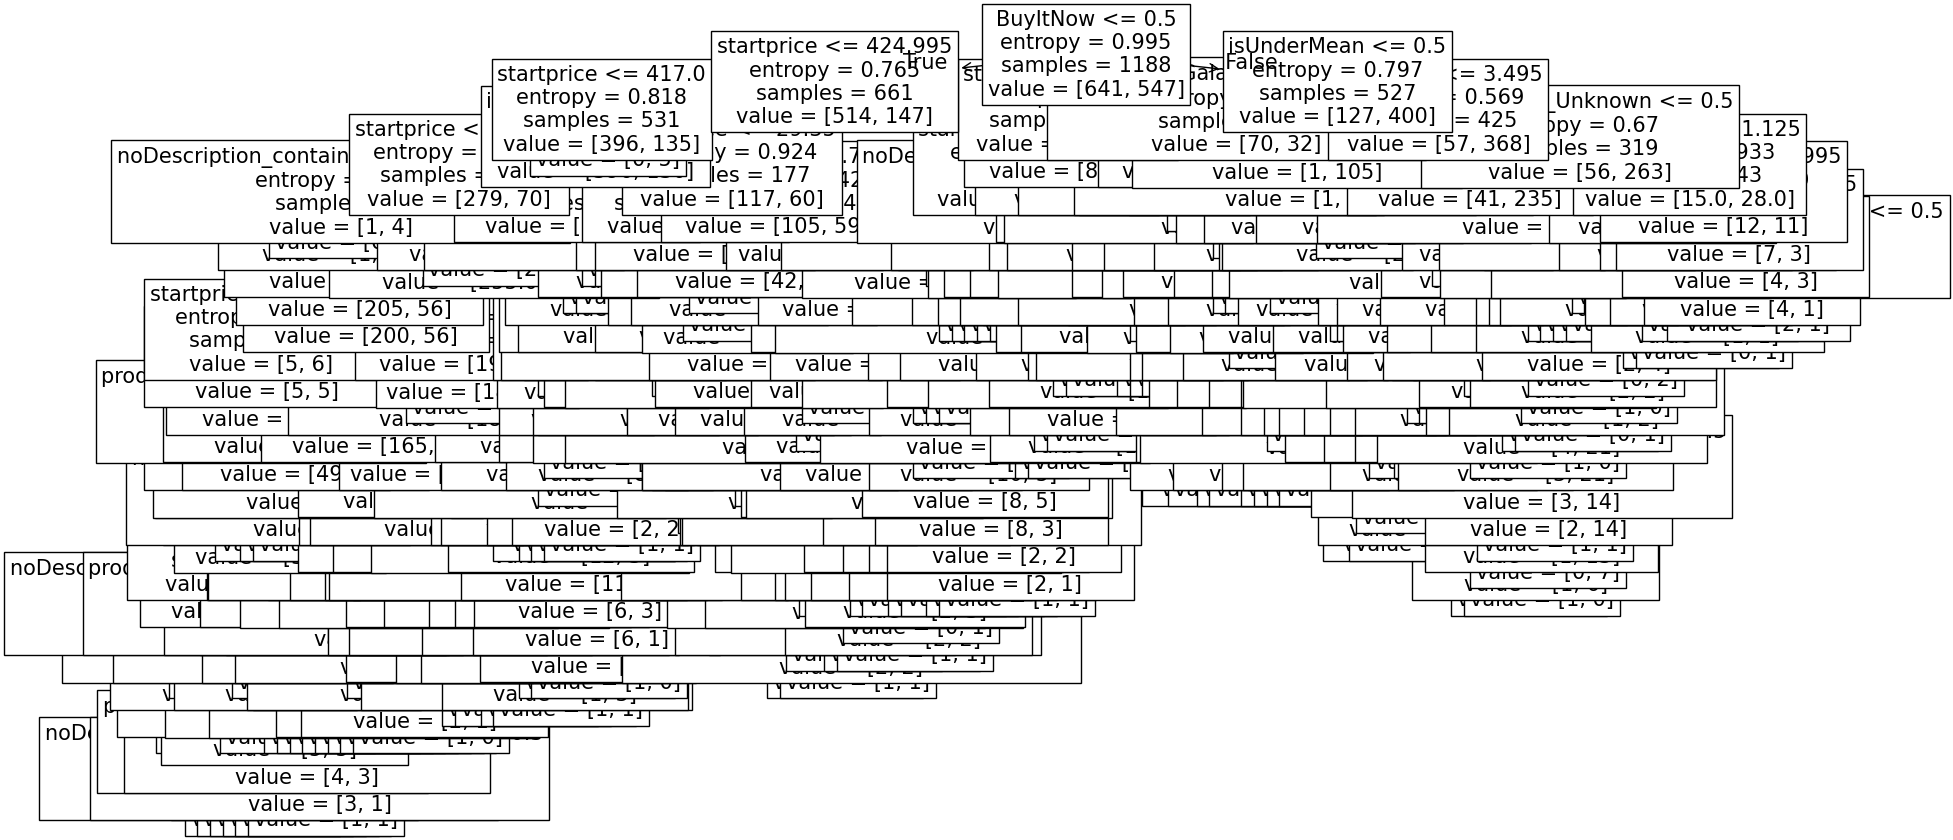

In [113]:
plt.figure(figsize=(20,10))
plot_tree(dtc3, feature_names=dtc3.feature_names_in_, fontsize=15)

[Text(0.5, 0.875, 'BuyItNow <= 0.5\ngini = 0.497\nsamples = 1188\nvalue = [641, 547]'),
 Text(0.25, 0.625, 'startprice <= 424.995\ngini = 0.346\nsamples = 661\nvalue = [514, 147]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'startprice <= 417.0\ngini = 0.379\nsamples = 531\nvalue = [396, 135]'),
 Text(0.0625, 0.125, 'gini = 0.372\nsamples = 526\nvalue = [396, 130]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.375, 0.375, 'startprice <= 474.3\ngini = 0.168\nsamples = 130\nvalue = [118, 12]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.4375, 0.125, 'gini = 0.213\nsamples = 99\nvalue = [87, 12]'),
 Text(0.75, 0.625, 'startprice <= 142.475\ngini = 0.366\nsamples = 527\nvalue = [127, 400]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'startprice <= 51.125\ngini = 0.198\nsamples = 332\nvalue = [37, 295]'),
 Text(0.5625, 0.125, 'gini = 0.102\nsamples = 205\nvalue = [11, 194]'),
 Text(0.6875, 0.125, 'gini = 0.326\nsa

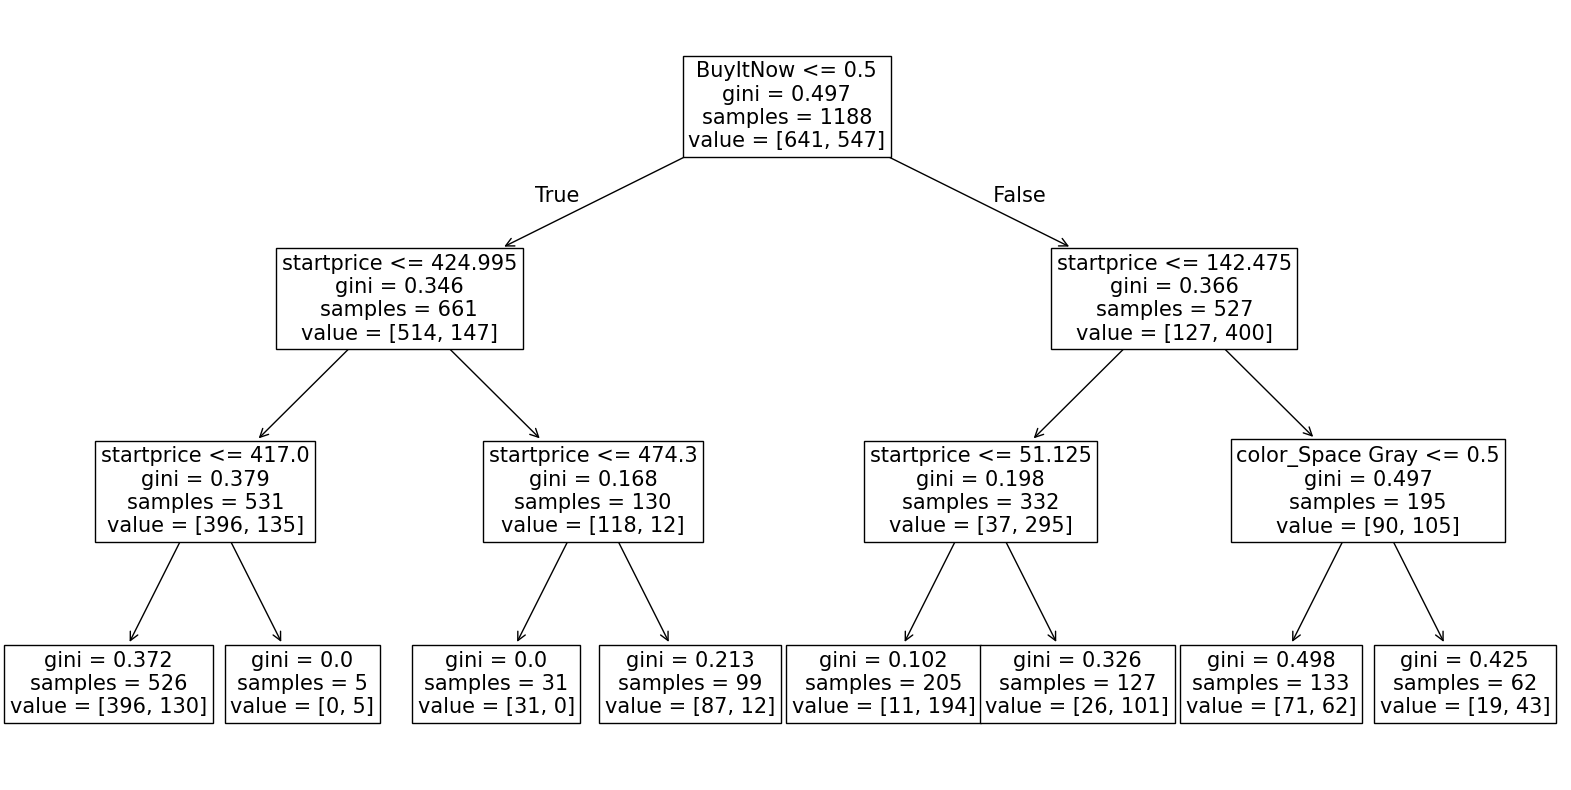

In [114]:
plt.figure(figsize=(20,10))
plot_tree(dtc2, feature_names=dtc2.feature_names_in_, fontsize=15)

[Text(0.4460227272727273, 0.9166666666666666, 'BuyItNow <= 0.5\ngini = 0.497\nsamples = 1188\nvalue = [641, 547]'),
 Text(0.18181818181818182, 0.75, 'startprice <= 424.995\ngini = 0.346\nsamples = 661\nvalue = [514, 147]'),
 Text(0.3139204545454546, 0.8333333333333333, 'True  '),
 Text(0.11363636363636363, 0.5833333333333334, 'startprice <= 417.0\ngini = 0.379\nsamples = 531\nvalue = [396, 135]'),
 Text(0.09090909090909091, 0.4166666666666667, 'startprice <= 208.495\ngini = 0.372\nsamples = 526\nvalue = [396, 130]'),
 Text(0.045454545454545456, 0.25, 'productline_Unknown <= 0.5\ngini = 0.421\nsamples = 229\nvalue = [160, 69]'),
 Text(0.022727272727272728, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.06818181818181818, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.13636363636363635, 0.25, 'color_White <= 0.5\ngini = 0.326\nsamples = 297\nvalue = [236, 61]'),
 Text(0.11363636363636363, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1590909090909091, 0.08333333333333333, '\n  (...)  \n

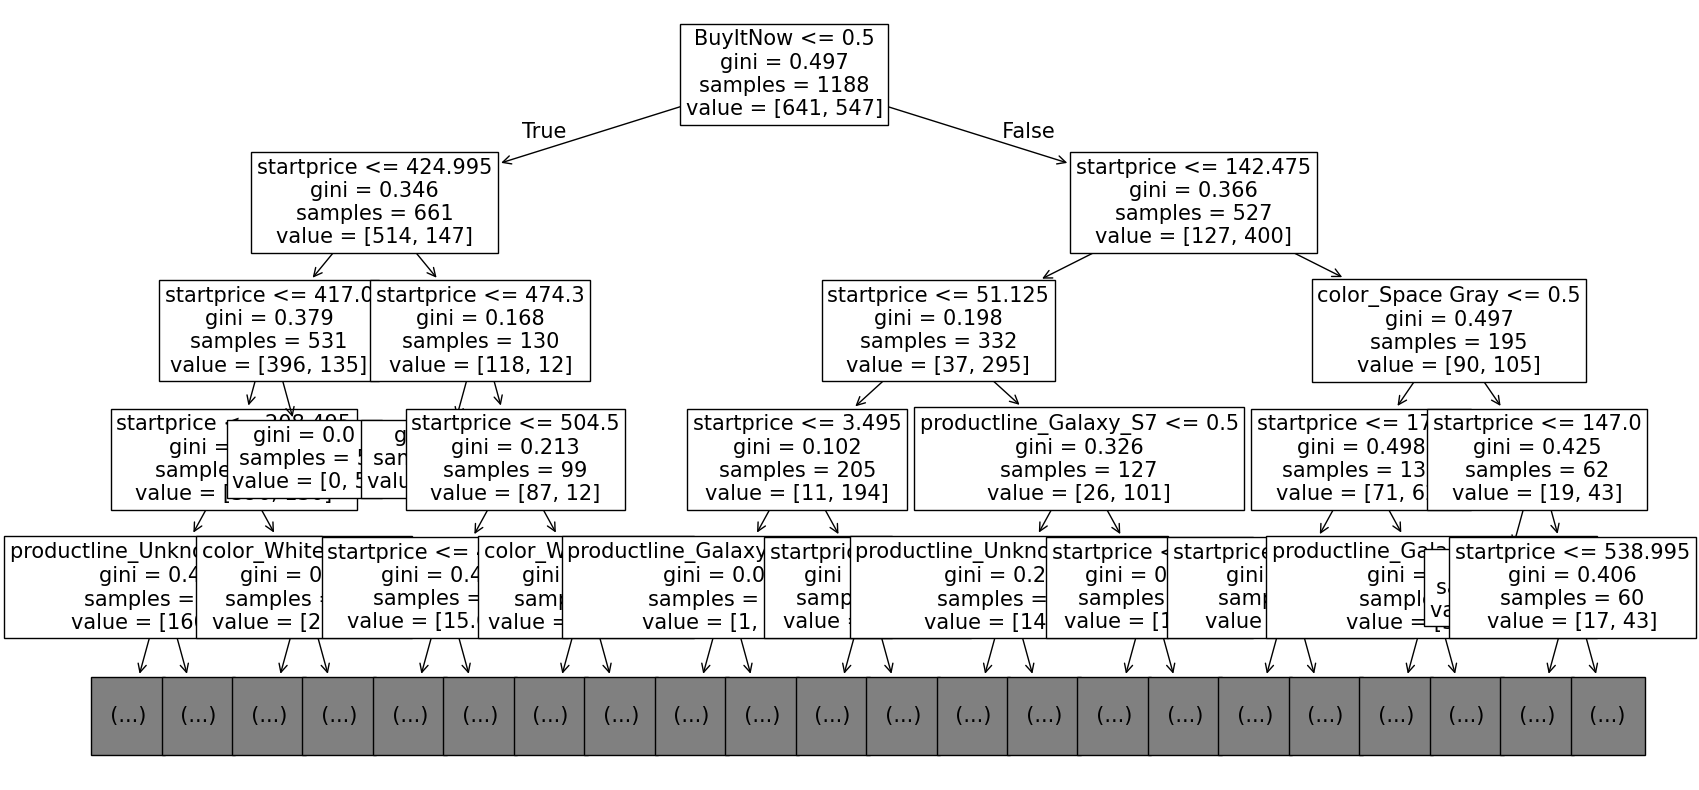

In [115]:
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=dtc.feature_names_in_, fontsize=15, max_depth=4)

In [116]:
dtc_importance = pd.DataFrame([dtc.feature_importances_], columns=dtc.feature_names_in_).T.sort_values(by=0, ascending=False)

In [117]:
dtc_importance

,0
startprice,0.501893
BuyItNow,0.324292
color_White,0.034056
color_Space Gray,0.029265
productline_Unknown,0.027240
productline_Galaxy_S8,0.018352
productline_Galaxy_Note9,0.018088
productline_Galaxy_Note8,0.015588
productline_Galaxy_S9,0.015103
productline_Galaxy_S7,0.009676


<Axes: >

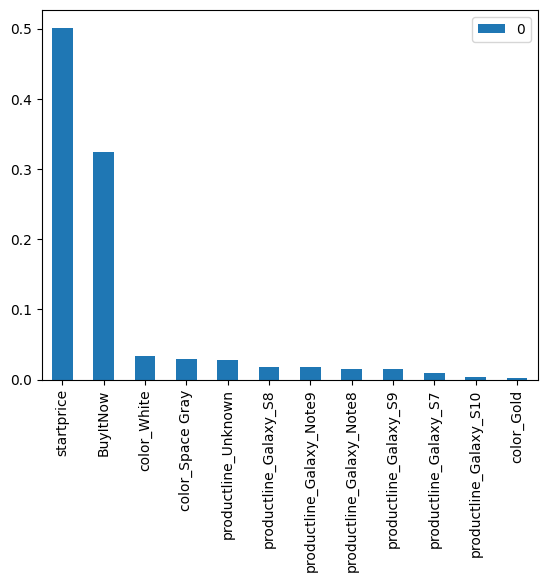

In [118]:
dtc_importance.plot(kind='bar')

In [119]:
dtc3_importance = pd.DataFrame([dtc3.feature_importances_], columns=dtc3.feature_names_in_).T.sort_values(by=0, ascending=False)
dtc3_importance

,0
startprice,0.453429
BuyItNow,0.238078
isUnderMean,0.087959
noDescription_contains description,0.033653
productline_Unknown,0.028030
color_Space Gray,0.026891
productline_Galaxy_S9,0.022530
color_Black,0.018689
productline_Galaxy_S8,0.017616
noDescription_no description,0.016401


In [120]:
data4 = data3.copy()
data4.head()

,BuyItNow,startprice,sold,isUnderMean,color_Black,color_Gold,color_Space Gray,color_White,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,1,1,False,False,False,True,False,False,False,False,False,False,True,False,False,True
1,0,235.00,0,1,False,False,False,True,False,False,True,False,False,False,False,False,False,True
2,0,199.99,0,0,False,False,False,True,False,False,False,False,False,False,False,True,True,False
3,1,175.00,1,1,False,False,True,False,False,False,True,False,False,False,False,False,False,True
4,1,100.00,1,1,False,False,True,False,False,False,False,False,False,True,False,False,False,True


In [121]:
X4 = data4[['BuyItNow', 'isUnderMean']]
y4 = data4['sold']

In [122]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=7)

In [123]:
dtc4 = DecisionTreeClassifier(max_depth=2, random_state=7)
dtc4.fit(X4_train, y4_train)
pred4 = dtc4.predict(X4_test)
print(accuracy_score(y4_test, pred4))
print(classification_report(y4_test, pred4))

0.8114478114478114
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       158
           1       0.87      0.70      0.78       139

    accuracy                           0.81       297
   macro avg       0.82      0.80      0.81       297
weighted avg       0.82      0.81      0.81       297



In [124]:
# !pip install ydata-profiling

In [125]:
from ydata_profiling import ProfileReport

C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [126]:
profile = ProfileReport(data, title="Profiling Report")
profile.to_file("samsung_ebay.html")

Export report to file: 100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 199.92it/s]
